In [79]:
# Importar las librerías necesarias

# Manipulación y análisis de datos
import pandas as pd  # Para la manipulación de dataframes
import numpy as np   # Para operaciones numéricas

# Visualización de datos
import matplotlib.pyplot as plt  # Para graficar
import seaborn as sns  # Para visualización estadística

# Librerías de machine learning
from sklearn.preprocessing import StandardScaler  # Para escalar características numéricas
from sklearn.cluster import KMeans  # Algoritmo de clustering
from sklearn.metrics import silhouette_score  # Métrica para evaluar la calidad del clustering

# Librería adicional para cálculos matemáticos
import scipy

In [80]:
df = pd.read_csv('customer_segmentation.csv', sep=',')

In [81]:
# Calcular la columna 'Total_Purchases' sumando los montos de las diferentes categorías de productos
df['Total_Purchases'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Crear el nuevo DataFrame 'df1' con las variables seleccionadas: 'Income', 'Total_Purchases', 'NumWebVisitsMonth'
df1 = df[['Income', 'Total_Purchases', 'NumWebVisitsMonth']].copy()

# Visualizar las primeras filas de df1
df1.head()

,Income,Total_Purchases,NumWebVisitsMonth
0,58138.0,1617,7
1,46344.0,27,5
2,71613.0,776,4
3,26646.0,53,6
4,58293.0,422,5


In [82]:
print(df1.isnull().sum())

Income               24
Total_Purchases       0
NumWebVisitsMonth     0
dtype: int64


In [83]:
df1 = df1.dropna()

print(df1.isnull().sum())

Income               0
Total_Purchases      0
NumWebVisitsMonth    0
dtype: int64


In [84]:
# Importar librerías necesarias
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Aplicar MinMaxScaler para escalar los datos entre 0 y 1
scaler = MinMaxScaler()
df1_scaled = scaler.fit_transform(df1)

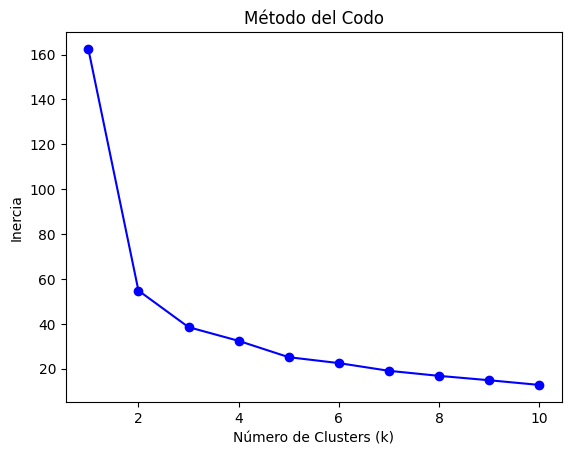

In [85]:
# Método del codo para determinar el número óptimo de clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para observar el codo
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [86]:
# Entrenar el modelo de K-Means con el número de clusters deseado
kmeans = KMeans(n_clusters=3, random_state=42)  # Cambia el número de clusters según el resultado del método del codo
kmeans.fit(df1_scaled)

KMeans(n_clusters=3, random_state=42)

In [87]:
# Predecir los clusters
df1['Cluster'] = kmeans.labels_

# Ver el resultado de los clusters asignados
print(df1['Cluster'].value_counts())

# Opcional: Agregar los centroides si deseas visualizarlos
centroids = kmeans.cluster_centers_
print(centroids)

Cluster
0    1255
1     597
2     364
Name: count, dtype: int64
[[0.05492716 0.05977352 0.32140016]
 [0.09662335 0.36161942 0.21153846]
 [0.11504761 0.65944686 0.16301939]]


Coeficiente promedio de silueta: 0.4934194052360011


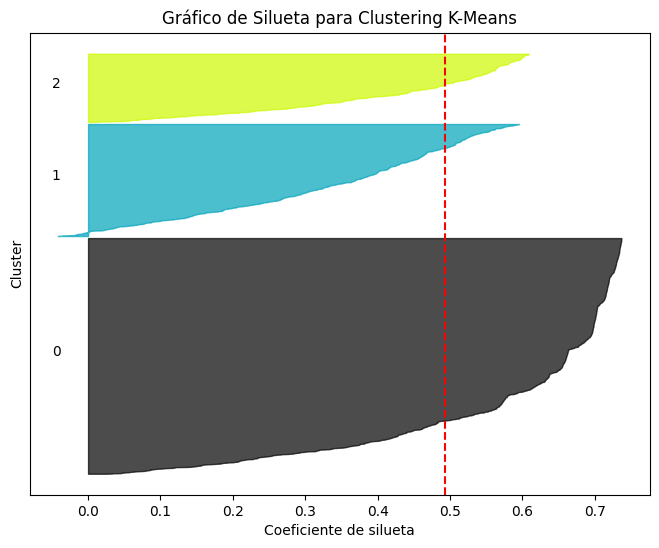

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcular los valores de silueta para cada punto
silhouette_vals = silhouette_samples(df1_scaled, df1['Cluster'])

# Calcular el coeficiente promedio de silueta
silhouette_avg = silhouette_score(df1_scaled, df1['Cluster'])
print(f"Coeficiente promedio de silueta: {silhouette_avg}")

# Crear el gráfico de silueta
n_clusters = 3  # Cambia esto si el número de clusters es diferente
fig, ax = plt.subplots(figsize=(8, 6))

y_lower = 10
for i in range(n_clusters):
    # Agregar valores de silueta del cluster i
    ith_cluster_silhouette_vals = silhouette_vals[df1['Cluster'] == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    # Colorear cada cluster
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Etiquetas de cluster en el gráfico
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Preparar el siguiente gráfico de cluster
    y_lower = y_upper + 10

# Estética del gráfico
ax.set_title("Gráfico de Silueta para Clustering K-Means")
ax.set_xlabel("Coeficiente de silueta")
ax.set_ylabel("Cluster")

# Línea vertical para el promedio de silueta
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Quitar ejes Y
ax.set_yticks([])

plt.show()

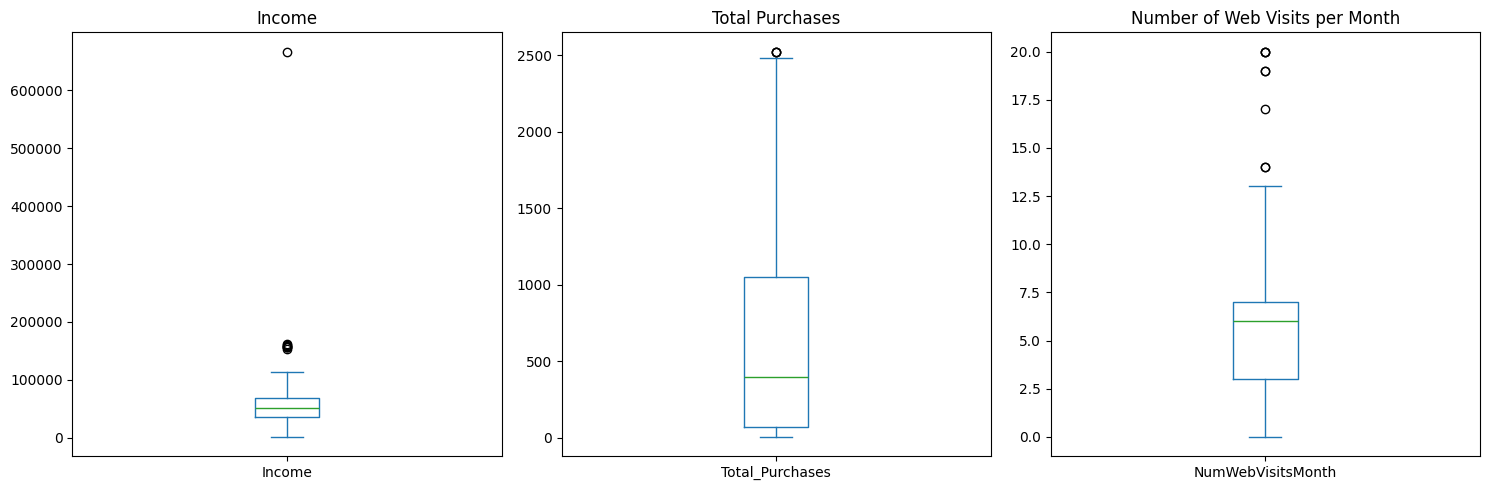

In [89]:
import matplotlib.pyplot as plt

# Asumiendo que df1 es tu DataFrame y contiene las columnas mencionadas.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Ajusta el tamaño según sea necesario

# Gráfico de caja para 'Income'
df1['Income'].plot(kind='box', ax=axes[0], title='Income')

# Gráfico de caja para 'Total_Purchases'
df1['Total_Purchases'].plot(kind='box', ax=axes[1], title='Total Purchases')

# Gráfico de caja para 'NumWebVisitsMonth'
df1['NumWebVisitsMonth'].plot(kind='box', ax=axes[2], title='Number of Web Visits per Month')

plt.tight_layout()  # Ajusta automáticamente los subplots
plt.show()

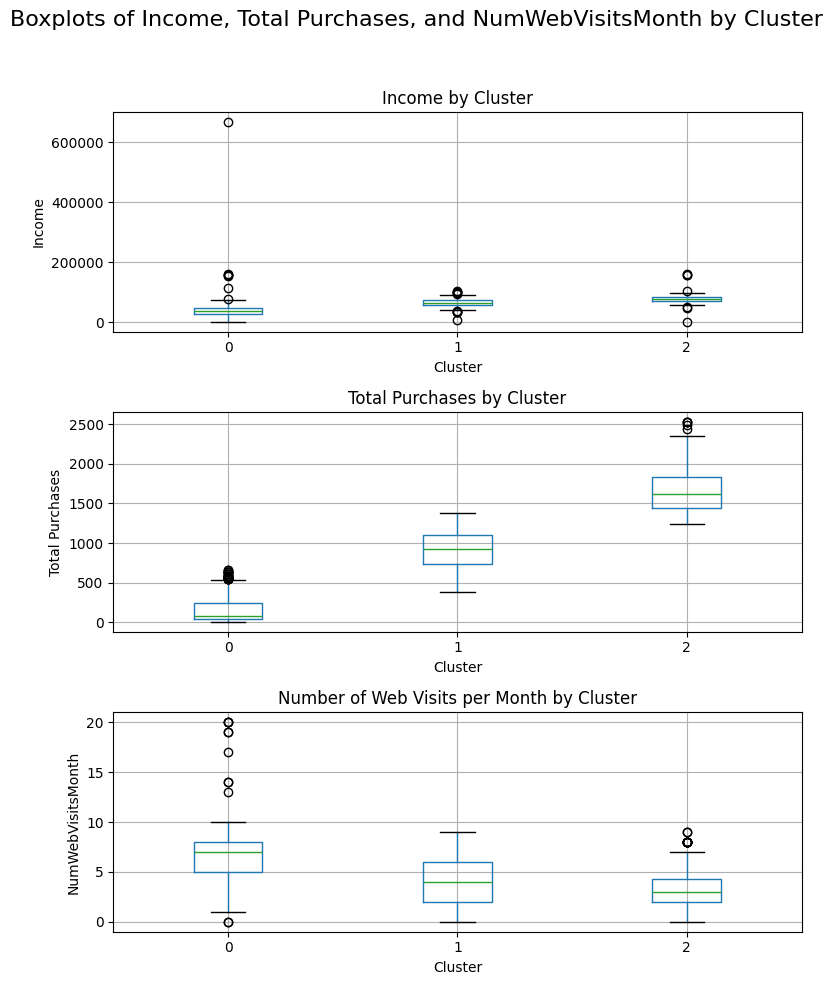

In [90]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# Gráfico de caja para 'Income' por cluster
df1.boxplot(column='Income', by='Cluster', ax=axes[0])
axes[0].set_title('Income by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Income')

# Gráfico de caja para 'Total_Purchases' por cluster
df1.boxplot(column='Total_Purchases', by='Cluster', ax=axes[1])
axes[1].set_title('Total Purchases by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Total Purchases')

# Gráfico de caja para 'NumWebVisitsMonth' por cluster
df1.boxplot(column='NumWebVisitsMonth', by='Cluster', ax=axes[2])
axes[2].set_title('Number of Web Visits per Month by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('NumWebVisitsMonth')

# Mejora en la visualización de los títulos y etiquetas
plt.suptitle('Boxplots of Income, Total Purchases, and NumWebVisitsMonth by Cluster', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta la disposición general para dejar espacio para el título principal

plt.show()

In [91]:
# Agrupar por 'Cluster' y usar agg() para aplicar múltiples funciones estadísticas a las columnas seleccionadas
cluster_summary = df1.groupby('Cluster').agg({
    'Income': ['mean', 'median', 'std', 'min', 'max', 'count'],
    'Total_Purchases': ['mean', 'median', 'std', 'min', 'max', 'count'],
    'NumWebVisitsMonth': ['mean', 'median', 'std', 'min', 'max', 'count']
})

# Mostrar el resumen estadístico para cada cluster
cluster_summary.T

Cluster                               0              1              2
Income            mean     38218.803984   65896.070352   78229.000000
                  median   37284.000000   65370.000000   78423.500000
                  std      23237.917460   10818.896357   12057.376671
                  min       1730.000000    7144.000000    2447.000000
                  max     666666.000000  102692.000000  160803.000000
                  count     1255.000000     597.000000     364.000000
Total_Purchases   mean       155.015936     913.385260    1663.304945
                  median      81.000000     928.000000    1615.000000
                  std        152.480709     222.448853     277.290318
                  min          5.000000     382.000000    1234.000000
                  max        662.000000    1374.000000    2525.000000
                  count     1255.000000     597.000000     364.000000
NumWebVisitsMonth mean         6.429482       4.249581       3.244505
                  median       7.000000       4.000000       3.000000
                  std          1.958401       2.226975       2.010468
                  min          0.000000       0.000000       0.000000
                  max         20.000000       9.000000       9.000000
                  count     1255.000000     597.000000     364.000000

In [92]:
df1.groupby('Cluster').describe().T

Cluster                              0              1              2
Income            count    1255.000000     597.000000     364.000000
                  mean    38218.803984   65896.070352   78229.000000
                  std     23237.917460   10818.896357   12057.376671
                  min      1730.000000    7144.000000    2447.000000
                  25%     27768.000000   58684.000000   71406.000000
                  50%     37284.000000   65370.000000   78423.500000
                  75%     46713.000000   72635.000000   83315.500000
                  max    666666.000000  102692.000000  160803.000000
Total_Purchases   count    1255.000000     597.000000     364.000000
                  mean      155.015936     913.385260    1663.304945
                  std       152.480709     222.448853     277.290318
                  min         5.000000     382.000000    1234.000000
                  25%        44.000000     735.000000    1443.000000
                  50%        81.000000     928.000000    1615.000000
                  75%       241.000000    1097.000000    1830.000000
                  max       662.000000    1374.000000    2525.000000
NumWebVisitsMonth count    1255.000000     597.000000     364.000000
                  mean        6.429482       4.249581       3.244505
                  std         1.958401       2.226975       2.010468
                  min         0.000000       0.000000       0.000000
                  25%         5.000000       2.000000       2.000000
                  50%         7.000000       4.000000       3.000000
                  75%         8.000000       6.000000       4.250000
                  max        20.000000       9.000000       9.000000